In [25]:
from IPython.display import Image, HTML, IFrame
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Lasso
from scipy.fftpack import dct, idct
from scipy.sparse import coo_matrix
from matplotlib.pyplot import plot, show, figure, title
import numpy as np

 ## Undetermined Models
### @rubychilds

## Myth: Models require more datapoints N than paramters P

## This Myth comes from classical models, always requiring N > P

## New data has pushed us torwards P >> N

## Examples of New Data

### 1. MicroArray Data: is number of genes, is number of patients
### 2. Financial Data: is number of stocks, prices, etc, is number of time points
### 3. Data Mining: automated data collection can imply large numbers of variables

## Fact: Can fit model with more parameters than points.

## This is an undetermined system

### It's important to note, that we may have a large number of coefficients to represent the data, but only a small number of salient features

> ## George Box (1986) Effect-Sparsity: the vast majority of factors have zero effect, only a small fraction actually affect the reponse.

# Undetermined vrs. Overdetermined

|            Undetermined  | Overdetermined |
| ------------- |:-------------:| 
| Fewer equations than unknowns, m < n| We have fewer unknowns than equations, m > n      | 
| Inconsistent, infinitely many systems| Can be inconsistent if we have a contradiction |
| No unique solution | Can have a unique solution, no solution or infinitely!| 




## Overdetermined Systems

### Let's have a look at this matrix which is an augmented matrix in echloen form. Here we clearly have 6 equations, so our $m = 6$, and unknowns is 3, $n = 3$, thus $ m > n$ and we have an overdetermined system

$$ \left(\begin{array}{ccc|c}  
  1 & 2 & -2 & 2\\
  0 & 1 & 7 & 3\\
  0 & 0 & 0 & 1\\
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0
\end{array}\right) $$

Each column, relates to $ x_1, x_2, x_3$

### We can obtain that $0x_3 = 1 $, which is not possible hence we have no solution!




## Undetermined Systems

### We have fewer equations than unknowns

### $$ x + y + z = 1 $$
### $$ x + y  + z = 0 $$

### Here, x, y, z are all unknowns

### The LHS for each equation is identical, thus we have **No solutions**, thus it is *inconsistent*

### $$ x + y + z = 1 $$
### $$ x + y  + 2z = 3 $$

### But here, we have an infitude of solutions, by subtracting first equation from second, thus obtain 

### $$z=2$$

### The issue here, is the infinite number of solutions we may have!

In [2]:
plt.style.use('ggplot')

def plot_simple_line():
    rng = np.random.RandomState(42)
    x = 10 * rng.rand(20)
    y = 2 * x + 5 + rng.randn(20)
    p = np.polyfit(x, y, 1)
    xfit = np.linspace(0, 10)
    yfit = np.polyval(p, xfit)
    plt.plot(x, y, 'ok')
    plt.plot(xfit, yfit, color='gray')
    plt.text(9.8, 1,
             "y = {0:.2f}x + {1:.2f}".format(*p),
             ha='right', size=14);

### Consider a line

### $$ y = mx + b $$
### $$\text{where }  m \text{ - gradient and } b \text{ is point of intersection} $$

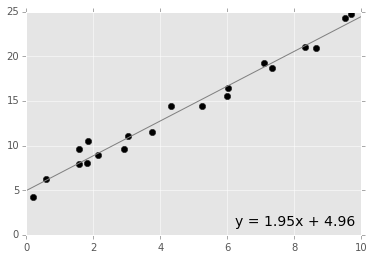

In [11]:
plot_simple_line()

### Here we fit a simple straight line to the data

### Clearly we have N datapoints, and two parameters in the model

In [12]:
def plot_simple_line_2():
    rng = np.random.RandomState(42)
    x = 10 * rng.rand(2)
    y = 2 * x + 5 + rng.randn(2)
    p = np.polyfit(x, y, 1)
    xfit = np.linspace(0, 10)
    yfit = np.polyval(p, xfit)
    plt.plot(x, y, 'ok')
    plt.plot(xfit, yfit, color='gray')
    plt.text(9.8, 1,
             "y = {0:.2f}x + {1:.2f}".format(*p),
             ha='right', size=14);

### When we have two points we can clearly fit a line

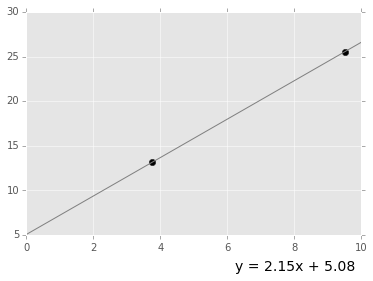

In [13]:
plot_simple_line_2()

### $$ m = \frac{y_1 - y_0}{x_1 - x_0} $$
### $$ y - y_1 = m(x - x_1)$$


### So if we have a cubic model, we have 4 parameters. If we have any less than 4 data points, we have an undetermined system

### For P parameters, we need at least N data points, where P=N for a determined system


In [14]:
def plot_underdetermined_fits(p, brange=(-0.5, 1.5), xlim=(-3, 3),
                              plot_conditioned=False):
    rng = np.random.RandomState(42)
    x, y = rng.rand(2, p).round(2)
    xfit = np.linspace(xlim[0], xlim[1])
    for r in rng.rand(20):
        # add a datapoint to make model specified
        b = brange[0] + r * (brange[1] - brange[0])
        xx = np.concatenate([x, [0]])
        yy = np.concatenate([y, [b]])
        theta = np.polyfit(xx, yy, p)
        yfit = np.polyval(theta, xfit)
        plt.plot(xfit, yfit, color='#BBBBBB')
    plt.plot(x, y, 'ok')
    
    if plot_conditioned:
        X = x[:, None] ** np.arange(p + 1)
        theta = np.linalg.solve(np.dot(X.T, X)
                                + 1E-3 * np.eye(X.shape[1]),
                                np.dot(X.T, y))
        Xfit = xfit[:, None] ** np.arange(p + 1)
        yfit = np.dot(Xfit, theta)
        plt.plot(xfit, yfit, color='black', lw=2)

def plot_underdetermined_line():
    plot_underdetermined_fits(1)

### Thus by having a single point we also get a undeteremined line, and hence we have an infitude of solutions like we did with the equation before

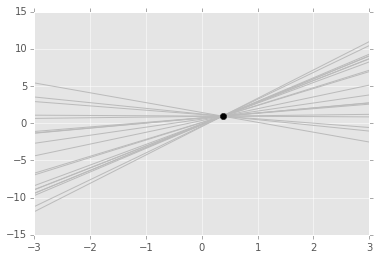

In [15]:
plot_underdetermined_line()

In [16]:
from IPython.display import display, Math, Latex

### Formalising our line equation where we have just two parameters...

### $$ y_m(x|\theta) = \theta_0 + \theta_1x $$

### $$ \text{If we let } \theta = [ \theta_0, \theta_1] $$

### We rewrite the above s.t. $$ y_M = X\theta $$


$$ X = \left[
\begin{array}{ll}
 1 & x_1 \\
 1 & x_2 \\
 \vdots &\vdots \\
 1 & x_N \\
\end{array}
\right] $$

$$ y_m = [ \begin{array}{ll} y_1 & y_2 & y_3 & \cdots & y_N \end{array}]^T $$

### If we have many parameters, we get ....
$$ $$

$$ X = \left[
\begin{array}{ll}
 1 & x_1 & \cdots & x_{1p} \\
 1 & x_2 & \cdots & x_{2p} \\
 \vdots &\vdots \\
 1 & x_N & \cdots & x_{Np} \\
\end{array}
\right] $$

###  $$ \theta = [ \begin{array}{ll} \theta_0 & \theta_1 & \theta_2 & \cdots & \theta_N \end{array}]^T $$

### $$ y_m = [ \begin{array}{ll} y_1 & y_2 & \cdots & y_N \end{array}]^T $$

### Rows in X = number of data points
### Columns = the no. of Parameters

## Finding $\theta$

### In order to find the best $ \theta $ we minimize the Sum of Squared Residuals

### $$ SS_{Res} = \chi^2 = \sum_{n=1}^N [y_n - y_M(x_n~|~\theta)]^2 $$

#### $$ y_n = \text{ actual y value, } y_M(x_n~|~\theta) = \text{ estimated value} $$

### We can form the vectorised version:

### $$ SS_{Res} =  \chi^2 = (y - X\theta)^T(y - X\theta) $$

### Thus we want to minimise SSRes with respect to $ \theta $

## Maximum Likelihood

### Here we use Maximum likelihood method, which gives us a way of estimating a paramter in the model. Here we are estimating $ \theta $

### 1. Differeniate $$ \frac{d\chi^2}{d\theta} = -2X^T(y - X\theta) $$

### 2. Set with respect to Zero $$ -2X^T(y - X\theta) = 0 $$

### 3. Rearrange with respect to $ \theta $

### $$ -2X^Ty + 2X^TX\theta = 0 $$
### $$ X^Ty = X^TX\theta $$
### $$ \hat{\theta}_{MLE} = [X^T X]^{-1} X^T y $$

### Now to estimate our $ \theta $, our key lies in $ X^TX $ being invertible

### By definition of invertibility:
* There exists a matrix, let's call this $ Z $ where we have $ XZ = ZX = 1$ This assumes $ X $ and $ Z $ are square
* $ X^TX $ must not be singular. A square matrix $ X $ is singular if $ det(X) = 0 $

### But is our matrix square?

### Our matrix is not square, as we have less data points aka. rows, than we have paramnters aka. columns

### Thus our $ X^TX $ is singular and so our $ \hat{\theta}_{MLE} $ is not well-defined

### So our challenge is to monitor that we need to make $ X^TX $ so it isn't singular!

### We can do this, by adding on a multiple of the Identity matrix $ \sigma I $, hence giving:

### $ C = X^TX + \sigma I $

### Adding this $\sigma I $ is $L1$ regularization

# Good news!

### We can solve this in Numpy....

###  $ \hat{\theta}_{MLE} =[X^TX + \sigma I]^{−1}X^Ty $

### $ \theta_0, \theta_1  = np.linalg.solve(X^TX + cond, np.dot(X^T, y)) $


In [17]:
X = np.array([[1, 0.37]]) # (x,y)=(0.37,0.95), using X = [[1, x_1]]

C = np.dot(X.T, X)

# b, m = np.linalg.solve(C, np.dot(X.T, [0.95])) If we try doing this, we get a singular matrix error - as its trying to invert our C

cond = 1E-3 * np.eye(2) # σ = 10−3
np.linalg.inv(C + cond) # checking this is invertible - try doing this on your own without adding the cond!

b, m = np.linalg.solve(C + cond, np.dot(X.T, [0.95])) 

print("Conditioned best-fit model:")
print("y = {0:.3f} x + {1:.3f}".format(m, b))

Conditioned best-fit model:
y = 0.309 x + 0.835


In [25]:
def plot_conditioned_line():
    plot_underdetermined_fits(1, plot_conditioned=True)

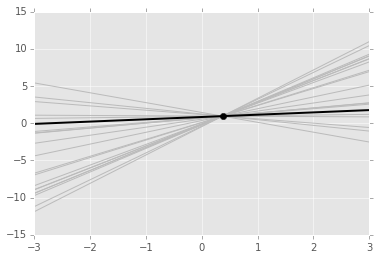

In [26]:
plot_conditioned_line()

### We have now settled on a single answer for a point of infinite answers!
### We did this through conditioning - by adding a multiple of the identity matrix!

## Regularization

### Regularization aims to penalise large parameters. We do this by adding a factor to $\chi^2$, such as $\lambda \theta^T\theta$, where this $\lambda$ is calculated by fine tuning.

$$\chi^2_{reg} = \chi^2 + \lambda~\theta^T\theta$$

### We add this term, as if we use least-square to fit a complex model, we are likely to overfit. 

### This tuning parameter allows us to change the complexity or smoothness of the model

### Putting this more generically, we introduce a regularization term, by:

$$ Model = \sum{ y - \hat{y} } + R(Model)$$

where $R$ is the regularization term

## Let's go back to our condition that we added....

###  $ \hat{\theta}_{MLE} =[X^TX + \sigma I]^{−1}X^Ty $

## When we calculate $\hat{\theta}_{MLE}$ using the new $\chi^2$ with regularization... we obtain....

###  $ \hat{\theta}_{MLE} =[X^TX + \lambda I]^{−1}X^Ty $

## It turns out our condition is the same as regularization!

## Thus by conditioning we are penalising large params and pushing some to zero!

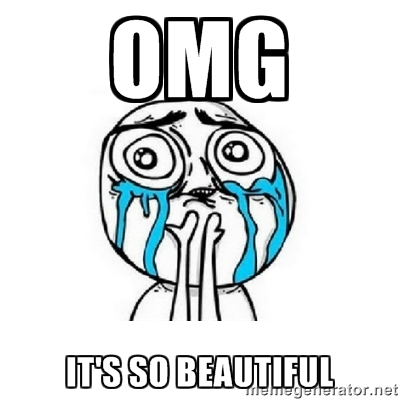

In [6]:
Image(filename="omg.jpg", width=500)

## The fact we have little data, many parameters has led us to CONDITION the model which in turn has allowed us to Regularize!

## Its like a BGOF deal!

## L1 and L2 Regularization

### L1 - sum of absolute value of the x

$$  \lambda \sum_{i=0}^{N-1} |w_i| $$

* Often prefered as it produces sparse models: large number of coefficients are zero
* Computationally inefficient on non-sparse cases
* Built in feature selection: produces sparse coefficients where very few are non-zero

### L2 - sqaure root of the sum of squares of a vectors coordinates

$$ \lambda \sqrt{\sum_{i=0}^{N-1} w_i^2} $$

* Often referred to as a weight decay
* Computationally more efficient due to having analytical solutions
* No feature selection: does not produce sparse coefficients

## Examples of Undetermined Models

### * Compressed Sensing - Image reconstruction: idea we want to reconstruct image with a small number of pixels
### * Kernel-based Methods -  Gaussian Processes: Fit infinitely dimensional model to finite data
### * Imperfect Detectors: Wehere data collected has biases and/or imperfections. Thus we either try to clean the data, or account for imperfections when data in the model

# Deep Dive: Compressed Sensing

## * Traditionaly measure data in full, then compress before storage or transmission - Full Sensing plus Compressing
## * But Compressed Sensing causes the number of measurements to be reduced during acquisition - imagine the data storage we save!
## * So we require sophisticated recovery procedures



# Image Reconstruction

Lets represent our image as $x$ and our discrete signal as $b$ such that we have:
    $b = Ax$
    
To obtain $b$ from $x$ we Encode. Recovering $x$ from b is Decoding

1. Undersample: Capture only a small, randomly chosen no. of the pixels of the image. This saves time and space. Here is where we have $ m < n $, an undetermined system.

2. Fill in the dots:  L1 minimization starts by arbitrarily picking one of the effectively infinite number of ways to fill in all missing pixels.

3. Add shapes: The algorithm then begins to modify the picture in stages by laying colored shapes over the randomly selected image. Seek sparsity, a measure of image simplicity.

4. Add smaller shapes: The algorithm inserts the smallest number of shapes, of the simplest kind, that match the original pixels. If it sees four adjacent green pixels, it may add a green rectangle there.

5. Achieve clarity: Iteration after iteration, the algorithm adds smaller and smaller shapes, always seeking sparsity. Eventually it creates an image that will almost certainly be a near-perfect facsimile of a hi-res one.

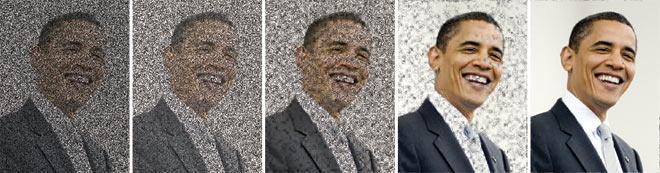

In [30]:
Image(filename="obama.jpg", width=1000)

## Applications:

### * MRI's
### * Digital cameras: Capture all pixels, then compress - Crazy!
### * Communications can hop from range to range, and so CS can take this sparse signal data to distinguise chatter from crackle on channels
### * GE Healthcare is currently using to speed up magnetic resonance scans

### In the future, we could just store 20% of the pixels
### Rather than focus on compression algorithms, we can focus on improving decompression!

## Compressive Sensing for Signals - Example

In [9]:
# Initializing constants and signals
N = 5000 # Number of samples
FS = 4e4 # 4hertz per second for sampling rate
M = 500 # Number of random samples we will use
f1, f2 = 697, 1336 # Pick any two touchtone frequencies

In [10]:
duration = 1./8 # We play with it for 1/8th of a second

In [11]:
t = np.linspace(0, duration, duration*FS) # returns evely spaced numbers over interval, start, stop, number

## To imitate the touchtone

## $$ f = \sin(2\pi f_1t) + \sin(2\pi f_2t)$$

In [12]:
f = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) # First and second tough tone freequecies

In [13]:
f = np.reshape(f, (len(f),1))

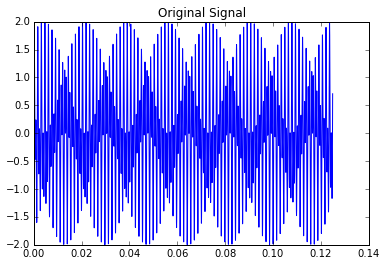

In [14]:
# Displaying the test signal
plot(t,f)
title('Original Signal')
show()

## As we are forming an undetermined model lets only use 500 samples

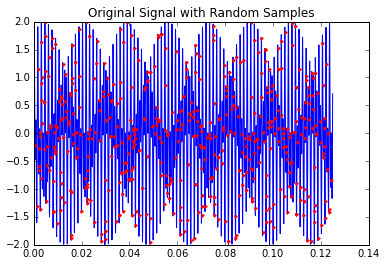

In [19]:
# We now select M random samples given a total N samples
k = np.random.randint(0,N,(M,))
k = np.sort(k) # making sure the random samples are monotonic
b = f[k]
plot(t, f,'b', t[k], b,'r.')
title('Original Signal with Random Samples')
show()

In [16]:
D = dct(np.eye(N)) # We use a discrete fourier tansform 
A = D[k,:]

In [ ]:
### We will use a Lasso technique as our L1 technique which constrains the L1 norm

In [17]:
## We use lasso for our regularization step
lasso = Lasso(alpha=0.001)
lasso.fit(A,b.reshape((M,)))

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

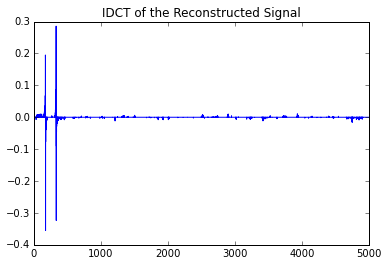

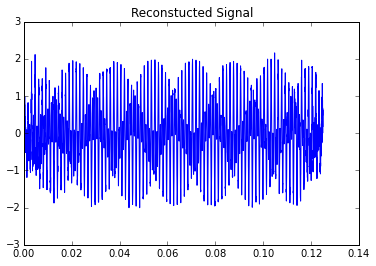

In [18]:
plot(lasso.coef_)
title('IDCT of the Reconstructed Signal')
recons = dct(lasso.coef_.reshape((N,1)),axis=0)
figure()


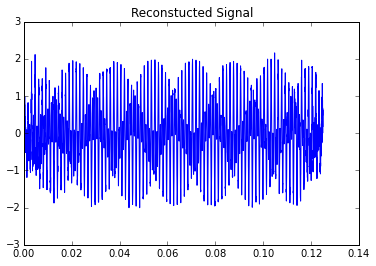

In [21]:
plot(t,recons)
title('Reconstucted Signal')
show()

## We can now see how sparse the matrix is!

In [28]:
recons_sparse = coo_matrix(lasso.coef_)
sparsity = 1 - float(recons_sparse.getnnz())/len(lasso.coef_)
print sparsity

0.9004


## Relevant Links

This presentation was based on the blog post:
* Blog [https://jakevdp.github.io/blog/2015/07/06/model-complexity-myth/](https://jakevdp.github.io/blog/2015/07/06/model-complexity-myth/)  
* Wired Compressed Sensing Algorithm [http://www.wired.com/2010/02/ff_algorithm/](http://www.wired.com/2010/02/ff_algorithm/)
* Brief intro to Compressed Sensing - Signals [http://www.gallamine.com/2014/02/a-brief-introduction-to-compressed.html](http://www.gallamine.com/2014/02/a-brief-introduction-to-compressed.html)
* Difference between L1 and L2 [http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)
* Magic Reconstruction: Compressed Sensing [http://uk.mathworks.com/company/newsletters/articles/clevescorner-compressed-sensing.html](http://uk.mathworks.com/company/newsletters/articles/clevescorner-compressed-sensing.html)
* Python for Signal Processing [http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/blob/master/Compressive_Sampling.ipynb](http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/blob/master/Compressive_Sampling.ipynb)
* Compressed sensing with SkiLean [http://brocabrain.blogspot.co.uk/2012/10/compressed-sensing-with-sklearn-dtmf.html](http://brocabrain.blogspot.co.uk/2012/10/compressed-sensing-with-sklearn-dtmf.html)

# Thank you!